![Tiger Math Image](tigermath.gif "tiger-math")

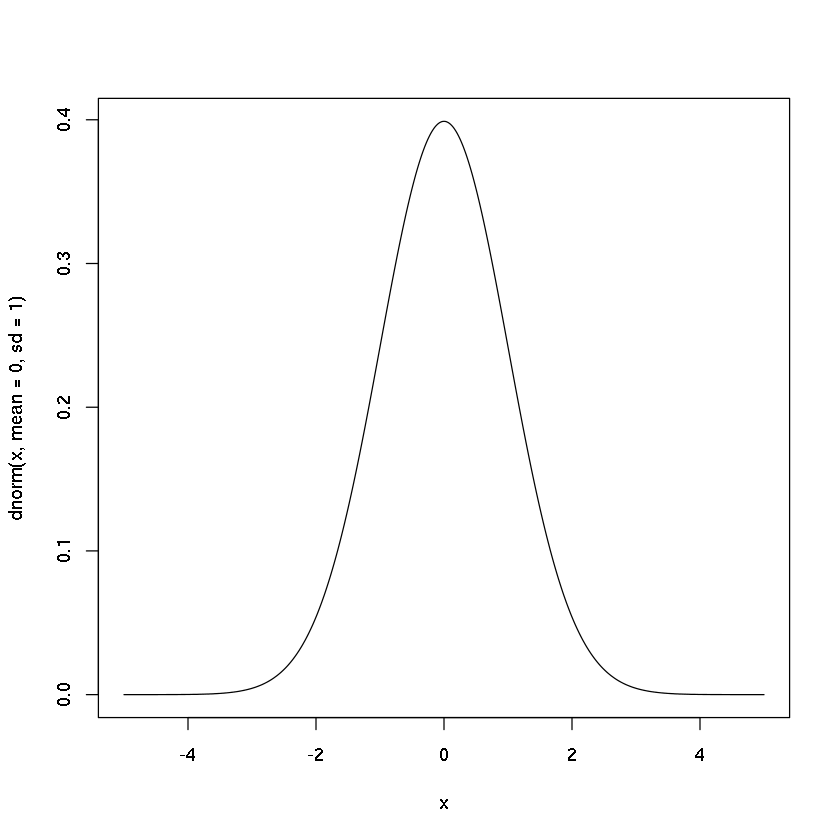

In [1]:
x <- seq(-5, 5, .01)
plot(x=x, y=dnorm(x, mean=0, sd=1), type='l')

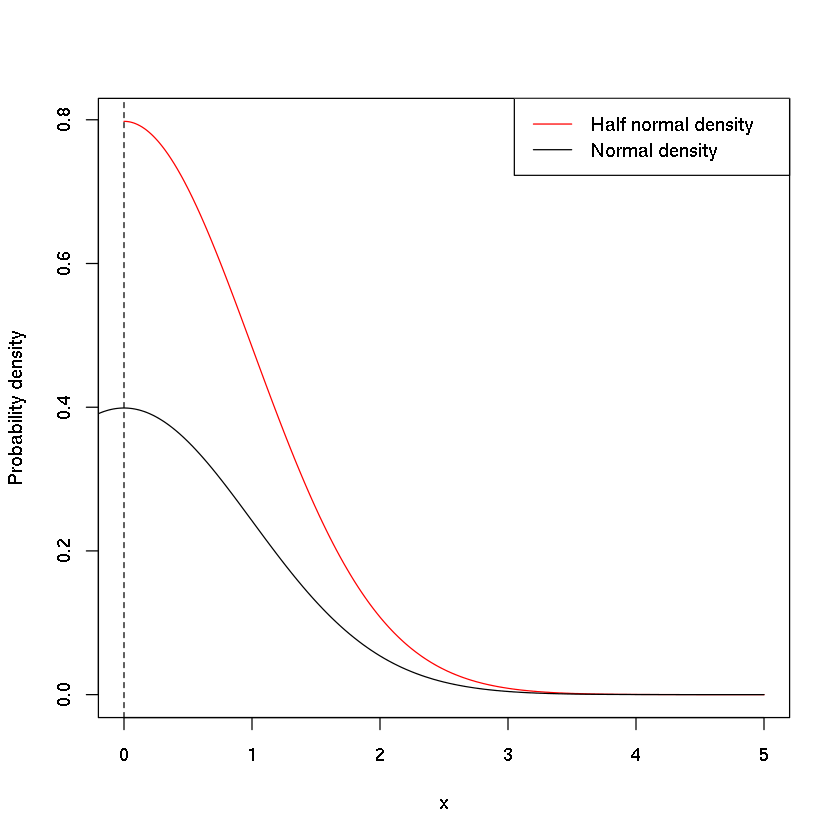

In [1]:
# plot half-normal with normal
x <- seq(-5, 5, .01)
xhalf <- seq(0, 5, .01)
plot(xhalf, 2*dnorm(xhalf), type = "l", col = "red", 
     xlab = "x", ylab = "Probability density")
lines(x, dnorm(x), type = "l")
abline(v = 0, lty = 2)
legend("topright", lty = 1, col = c("red", "black"), 
      legend = c("Half normal density", "Normal density"))

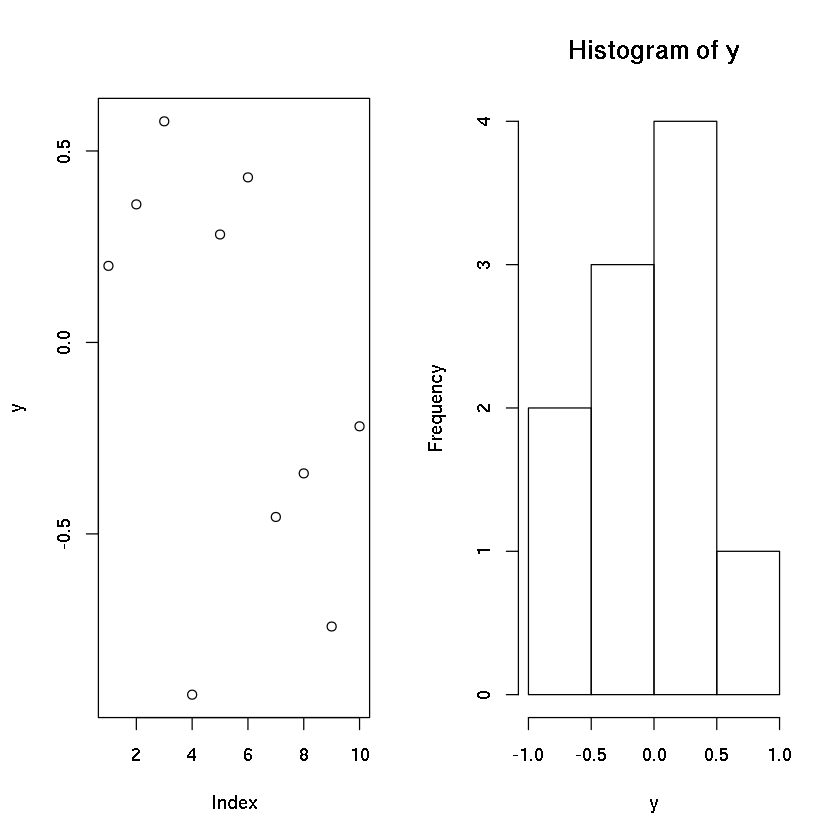

In [3]:
# Set up high level quantities
N_t <- 10

# Draw from prior distribution
sigma_y <- abs(rnorm(1, mean = 0, sd = 1))

# Draw observations 
y <- rnorm(N_t, mean = 0, sd = sigma_y)

# Visualize
par(mfrow = c(1, 2))
plot(y)
hist(y)

In [4]:
N_s <- 100 # number of sites
N_t <- 10 # number of time steps

# draw priors
sigma_y <- abs(rnorm(n = 1, mean = 0, sd = 1))
sigma_beta <- abs(rnorm(n = 1, mean = 0, sd = 1))
beta <- rnorm(n = N_t, mean = 0, sd = sigma_beta)

# draw observations from the likelihood
y <- matrix(nrow = N_s, ncol = N_t)
for (t in 1:N_t) {
    y[, t] <- rnorm(N_s, mean = beta[t], sd = sigma_y)
}

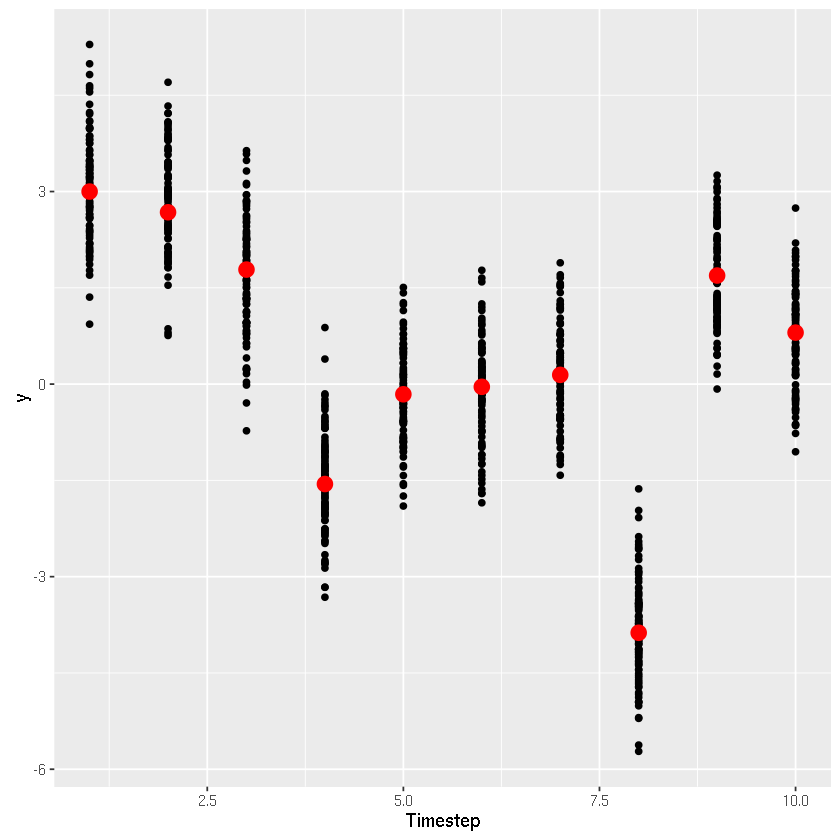

In [5]:
library(reshape2)
library(ggplot2)

y_df <- melt(y, varnames = c("Site", "Timestep"))

ggplot(y_df, aes(x = Timestep, y = value)) + 
    geom_point() + 
    ylab("y") + 
    geom_point(data = data.frame(Timestep = 1:N_t, value = beta), 
               col = "red", size = 4)

In [6]:
# initialize empty objects
y <- matrix(nrow = N_s, ncol = N_t)
beta <- rep(NA, N_t)

# draw from priors
sigma_eta <- abs(rnorm(n = 1, mean = 0, sd = 1))
eta <- rnorm(n = N_t, mean = 0, sd = sigma_eta)

beta_0 <- rnorm(n = 1, mean = 0, sd = 1)
for (t in 1:N_t) {
    if (t == 1) {
        beta[t] <- beta_0 + eta[t]
    } else {
        beta[t] <- beta[t - 1] + eta[t]
    }
}

# simulate observations
for (i in 1:N_s) {
    for (t in 1:N_t) {
        y[i, t] <- rnorm(n = 1, mean = beta[t], sd = sigma_y)
    }
}

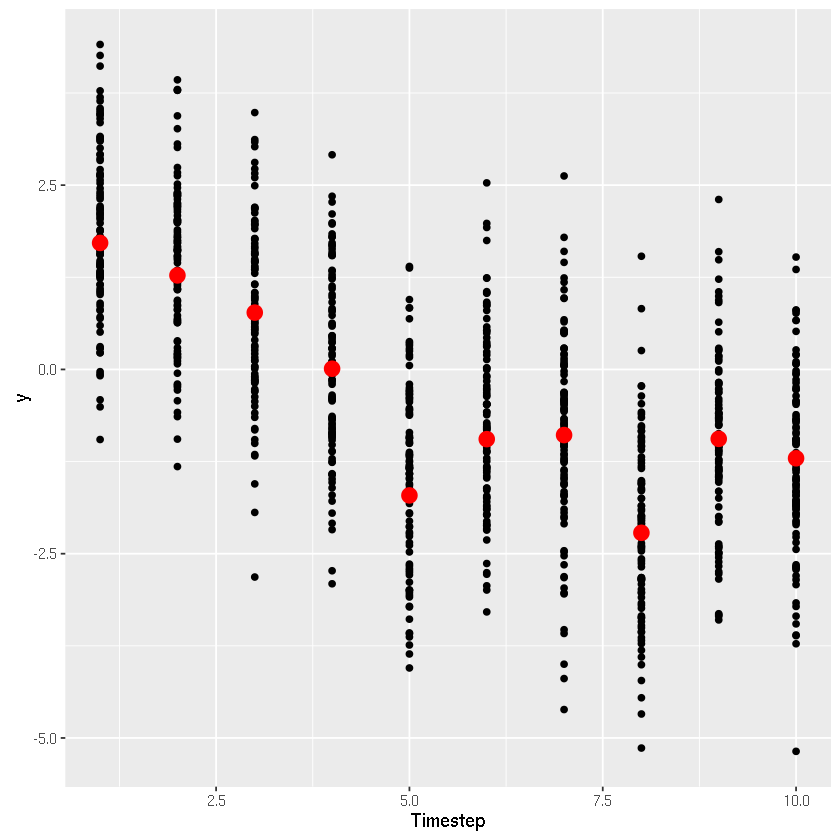

In [7]:
y_df <- melt(y, varnames = c("Site", "Timestep"))

ggplot(y_df, aes(x = Timestep, y = value)) + 
    geom_point() + 
    ylab("y") + 
    geom_point(data = data.frame(Timestep = 1:N_t, value = beta), 
               col = "red", size = 4)

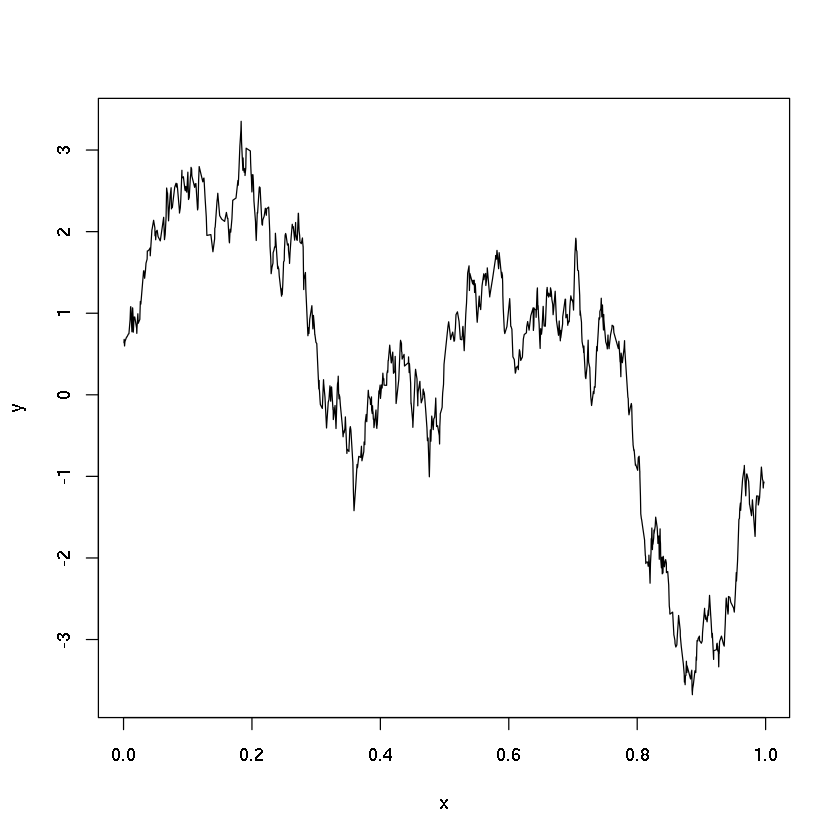

In [8]:
library(MASS) # for mvrnorm

# Set up data
N <- 1000
x <- sort(runif(N))
D <- as.matrix(dist(x))

# Choose parameters
gamma_sq <- 10
phi <- 1
sigma_sq <- .00001

K <- gamma_sq * exp(-phi * D) + sigma_sq * diag(N)

# Simulate observations
y <- mvrnorm(n = 1, mu = rep(0, N), Sigma = K)

plot(x, y, type = "l")

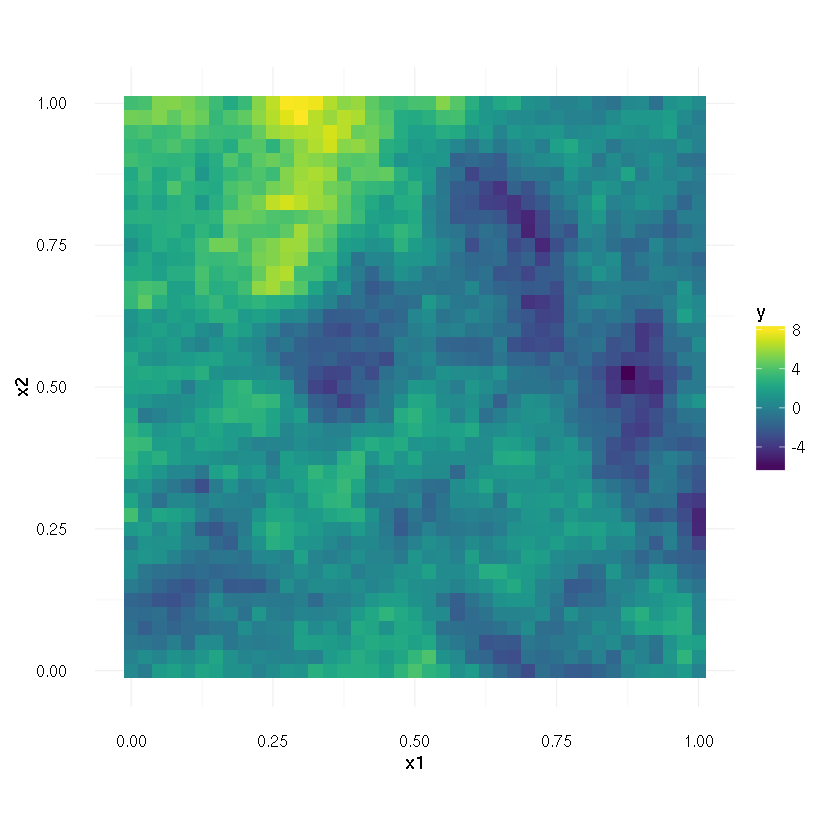

In [9]:
library(viridis) # for color palette
library(MASS) # for mvrnorm
library(reshape2)
library(ggplot2)

# Set up data
coords <- expand.grid(x1 = seq(0, 1, .025), 
                      x2 = seq(0, 1, .025))
N_s <- nrow(coords)
D <- as.matrix(dist(coords))


# Simulate parameters & observations
gamma_sq <- 10
phi <- 2
sigma_sq <- .01
K <- gamma_sq * exp(-phi * D) + sigma_sq * diag(N_s)
y <- mvrnorm(n = 1, mu = rep(0, N_s), Sigma = K)


# Visualize
coords$y <- y
ggplot(coords, aes(x = x1, y = x2, fill = y)) + 
    geom_tile() + 
    scale_fill_viridis() + 
    theme_minimal() + 
    coord_equal()

## Parameter Check

What are these:

1.) Control the amount of unexplained variation in y?

The nugget/standard deviation squared.

2.) Nugget effect? $\sigma^2$ 

AKA the unexplained variance

3.) Controls the magnitude among-timestep differences?

The spatial effect part of the spatio-temporal effect (alpha space)

$y(s, t) \sim \text{Normal}(\alpha_{s}+ \beta_{t}, \sigma_y)$

$\alpha_{s}$

4.) Determines the smoothness of the spatial effect?

Cumulative normal function of the normal distribution:

$$\phi \sim \text{Normal}_+(0, 1)$$

5.) Determines the amount of spatial process variation?

The $\gamma^2$ bit of the Univariate Gaussian processes:

$K(x) = \gamma^2 \text{exp}(-\phi D) + \sigma^2 I_N$

<em>I think.</em> Seems questionable, I'll update this later.

Likelihood

$$y(s, t) \sim \text{Normal}(\alpha_s + \beta_t, \sigma_y)$$

Priors

$$\alpha_s \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$$$\beta_t = \beta_{t - 1} + \eta_t$$$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$$$\sigma_y \sim \text{Normal}_+(0, 1)$$$$\gamma \sim \text{Normal}_+(0, 1)$$$$\phi \sim \text{Normal}_+(0, 1)$$

![Kriging Image](kriging.gif "krieger")

In [15]:
# set up data
N_s <- 100
N_t <- 30
x <- matrix(runif(N_s * 2), ncol = 2)
D <- as.matrix(dist(x))
y <- matrix(nrow = N_s, ncol = N_t)

# draw parameters
omega <- abs(rnorm(1))
phi <- abs(rnorm(1))
gamma <- abs(rnorm(1))
sigma_y <- abs(rnorm(1))
sigma_eta <- abs(rnorm(1))
beta_0 <- rnorm(1)

# temporal effects
beta <- rep(NA, N_t)
eta <- rnorm(n = N_t, mean = 0, sd = sigma_eta)
beta[1] <- beta_0 + eta[1]
for (t in 2:N_t) {
    beta[t] <- beta[t - 1] + eta[t]
}

# spatial effects
K <- gamma**2 * exp(-phi * D)
alpha <- mvrnorm(n = 1, mu = rep(0, N_s), Sigma = K)

# observations
for (i in 1:N_s) {
    for (t in 1:N_t) {
        y[i, t] <- rnorm(1, mean = alpha[i] + beta[t], sigma_y)
    }
}

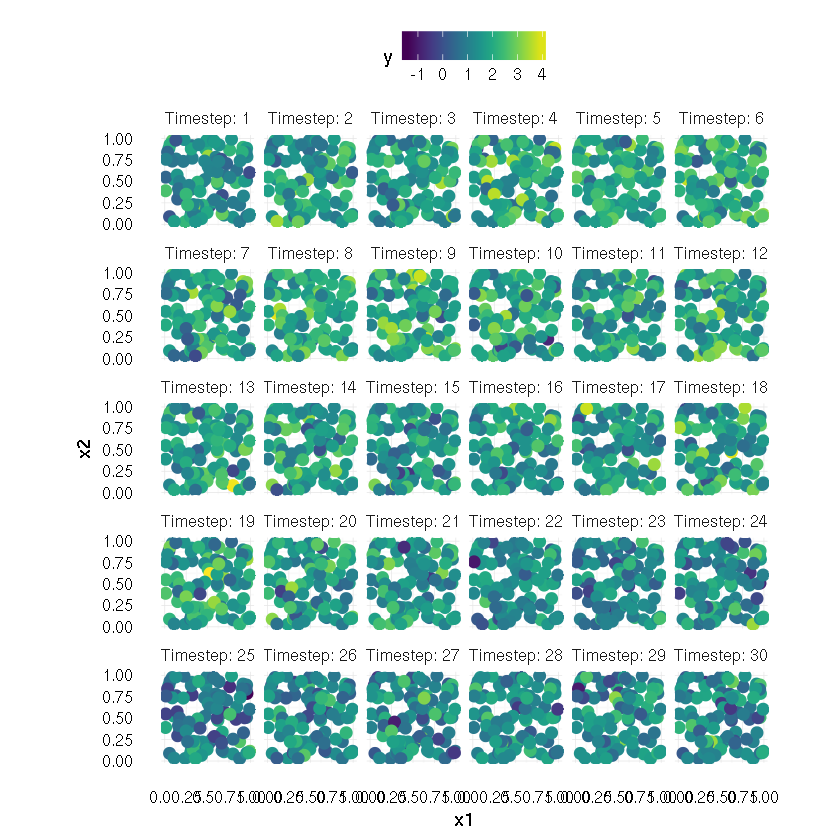

In [16]:
# make a data frame for y and add the spatial coordinates
y_df <- melt(y, varnames = c("Site", "Timestep"), value.name = "y")
y_df$x1 <- x[y_df$Site, 1]
y_df$x2 <- x[y_df$Site, 2]

ggplot(y_df, aes(x = x1, y = x2, color = y)) + 
    geom_point(size = 3) + 
    facet_wrap(~ Timestep, nrow = 5, labeller = "label_both") + 
    scale_color_viridis() + 
    theme_minimal() + 
    coord_equal() + 
    theme(legend.position = "top")

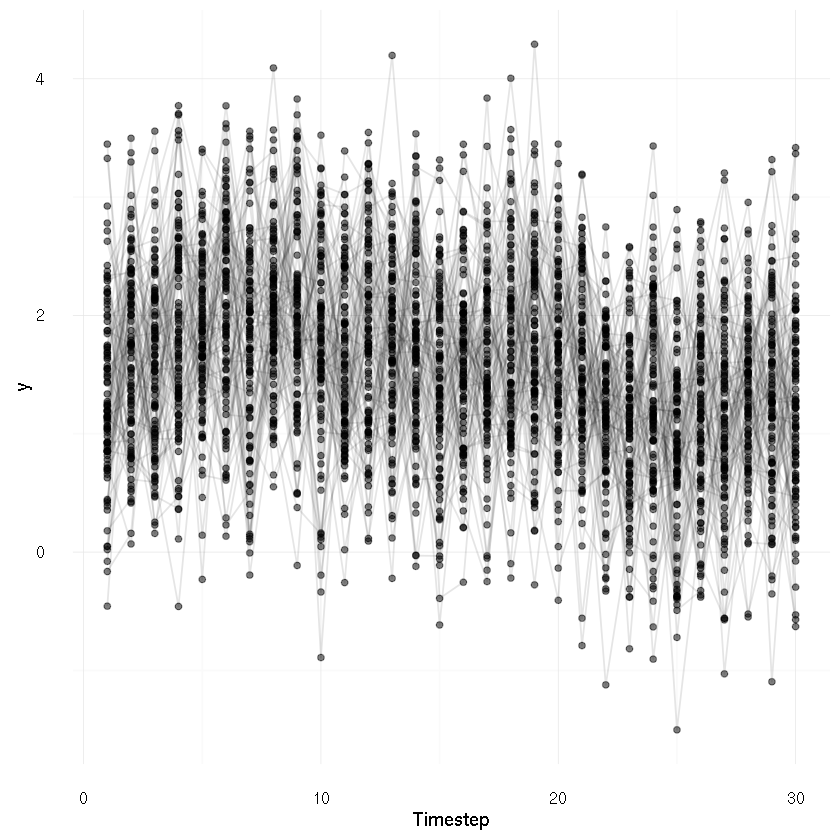

In [17]:
ggplot(y_df, aes(x = Timestep, y = y, group = Site)) + 
    geom_line(alpha = .1) + 
    geom_point(alpha = .5) + 
    theme_minimal()

Likelihood

$$y(s, t) \sim \text{Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$$

Priors

$$\alpha_{st} = \alpha_{s, t - 1} + \omega_{st}$$$$\omega_{s, t} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$$$\alpha_{s, t = 0} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$$$\beta_t = \beta_{t - 1} + \eta_t$$$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$$$\sigma_y \sim \text{Normal}_+(0, 1)$$$$\gamma \sim \text{Normal}_+(0, 1)$$$$\phi \sim \text{Normal}_+(0, 1)$$

In the previous model, we had only a spatial effect. The next model is including both the Markov dependence in time and spatial correlation in among-timestep differences with:

$$\alpha_{st} = \alpha_{s, t - 1} + \omega_{st}$$

In [18]:
# set up data
N_s <- 100
N_t <- 30
x <- matrix(runif(N_s * 2), ncol = 2)
D <- as.matrix(dist(x))
y <- matrix(nrow = N_s, ncol = N_t)

# draw parameters
phi <- abs(rnorm(1))
gamma <- abs(rnorm(1))
sigma_y <- abs(rnorm(1))

sigma_eta <- abs(rnorm(1))
eta <- rnorm(N_t, 0, sigma_eta)

# temporal effects
beta_0 <- rnorm(1)
beta <- rep(NA, N_t)
beta[1] <- beta_0 + eta[1]
for (t in 2:N_t) {
    beta[t] <- beta[t - 1] + eta[t]
}

# spatiotemporal effects
K <- gamma**2 * exp(-phi * D)
alpha_0 <- mvrnorm(n = 1, mu = rep(0, N_s), Sigma = K)
omega <- matrix(nrow = N_s, ncol = N_t)
alpha <- matrix(nrow = N_s, ncol = N_t)
for (t in 1:N_t) {
    omega[, t] <- mvrnorm(n = 1, mu = rep(0, N_s), Sigma = K)
    if (t == 1) {
        alpha[, t] <- alpha_0 + omega[, 1]
    } else {
        alpha[, t] <- alpha[, t - 1] + omega[, t]
    }
}

# observations
for (i in 1:N_s) {
    for (t in 1:N_t) {
        y[i, t] <- rnorm(1, mean = alpha[i, t] + beta[t], sd = sigma_y)
    }
}

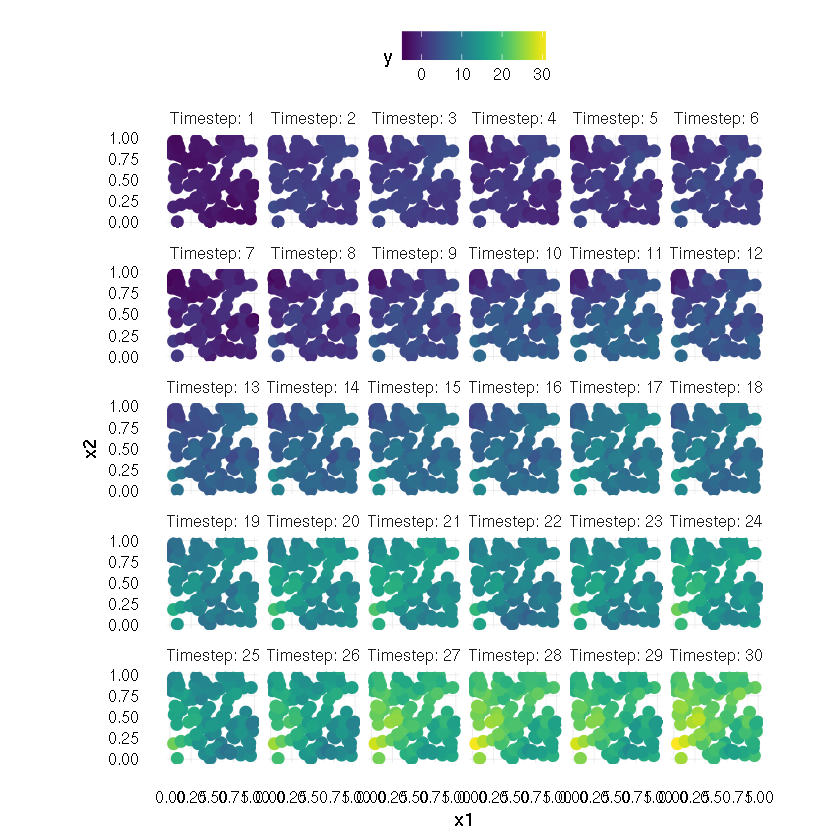

In [19]:
# make a data frame for y and add the spatial coordinates
y_df <- melt(y, varnames = c("Site", "Timestep"), value.name = "y")
y_df$x1 <- x[y_df$Site, 1]
y_df$x2 <- x[y_df$Site, 2]

ggplot(y_df, aes(x = x1, y = x2, color = y)) + 
    geom_point(size = 3) + 
    facet_wrap(~ Timestep, nrow = 5, labeller = "label_both") + 
    scale_color_viridis() + 
    theme_minimal() + 
    coord_equal() + 
    theme(legend.position = "top")

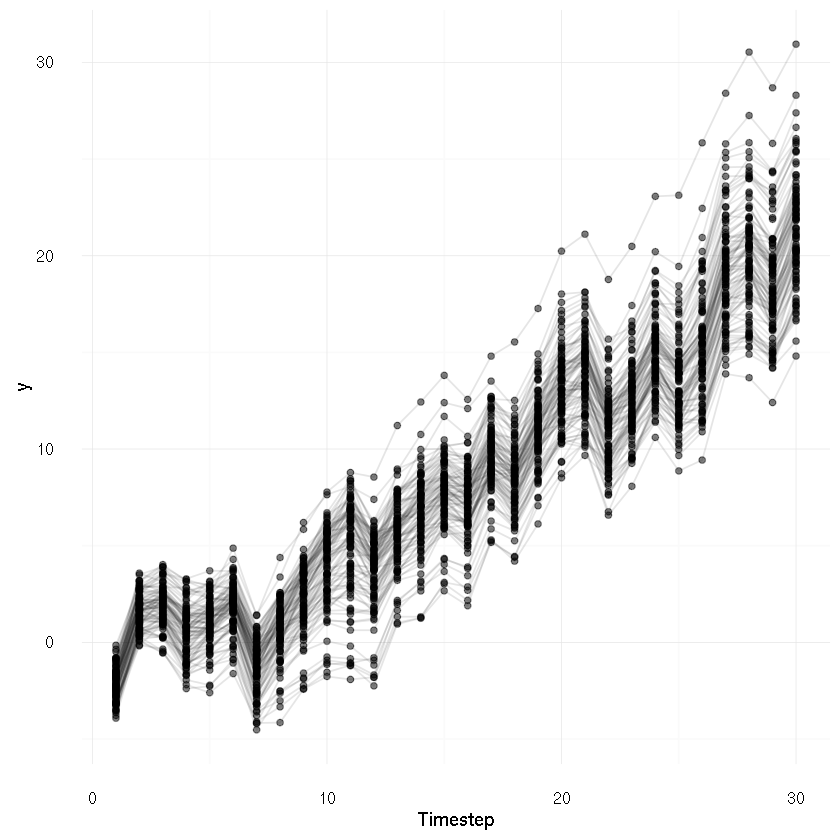

In [20]:
ggplot(y_df, aes(x = Timestep, y = y, group = Site)) + 
    geom_line(alpha = .1) + 
    geom_point(alpha = .5) + 
    theme_minimal()

## Check your understanding

Explain how you would modify your spatiotemporal process model to accomplish the following (e.g., which parameters would you change, and how would you change them?):

#### 1.) Reduce spatial variation:

~~You're grounded!~~ 

Reduce/change the nugget/unexplained variance: std squared:

$\sigma^2$

#### 2.) Increase the differences among years in the response y:

~~Wanderjahr!~~ 

~~Hausarrest haben!~~

Don't actually increase timestep:

$N_t = 10$

Actually change the:

$ _{t - 1}$ 

in 

$\alpha_{s, t - 1}$ 

in the spatiotemporal effect:

$\alpha_{st} = \alpha_{s, t - 1} + \omega_{st}$

To increase the difference. 

#### 3.) Increase the spatial range for the spatiotemporal effect, so that distant sites behave more similarly

~~Use the internet!~~ 

Half-normal distribution by taking:

$y(s, t) \sim \text{Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$

and changing:

$y(s, t) \sim \text{Half-Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$

![Potato face](potato.gif "Potato face")